# CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Get this Dataset from 
the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

or

https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

(Data file not added to repo)

In [6]:
import numpy as np 
import pandas as pd  
import cv2
import matplotlib.pyplot as plt 
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import os

In [23]:
import pathlib
import tensorflow as tf
from tensorflow.keras import layers

In [7]:
print(os.listdir("cell_images"))

['Parasitized', 'Uninfected']


In [8]:
train_data=os.listdir("cell_images/") 

In [9]:
train_data

['Parasitized', 'Uninfected']

In [10]:
parasitized_data = os.listdir("cell_images/Parasitized/") #Parazitli örnek
uninfected_data = os.listdir("cell_images/Uninfected/")#Parazitsiz temiz örnek

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


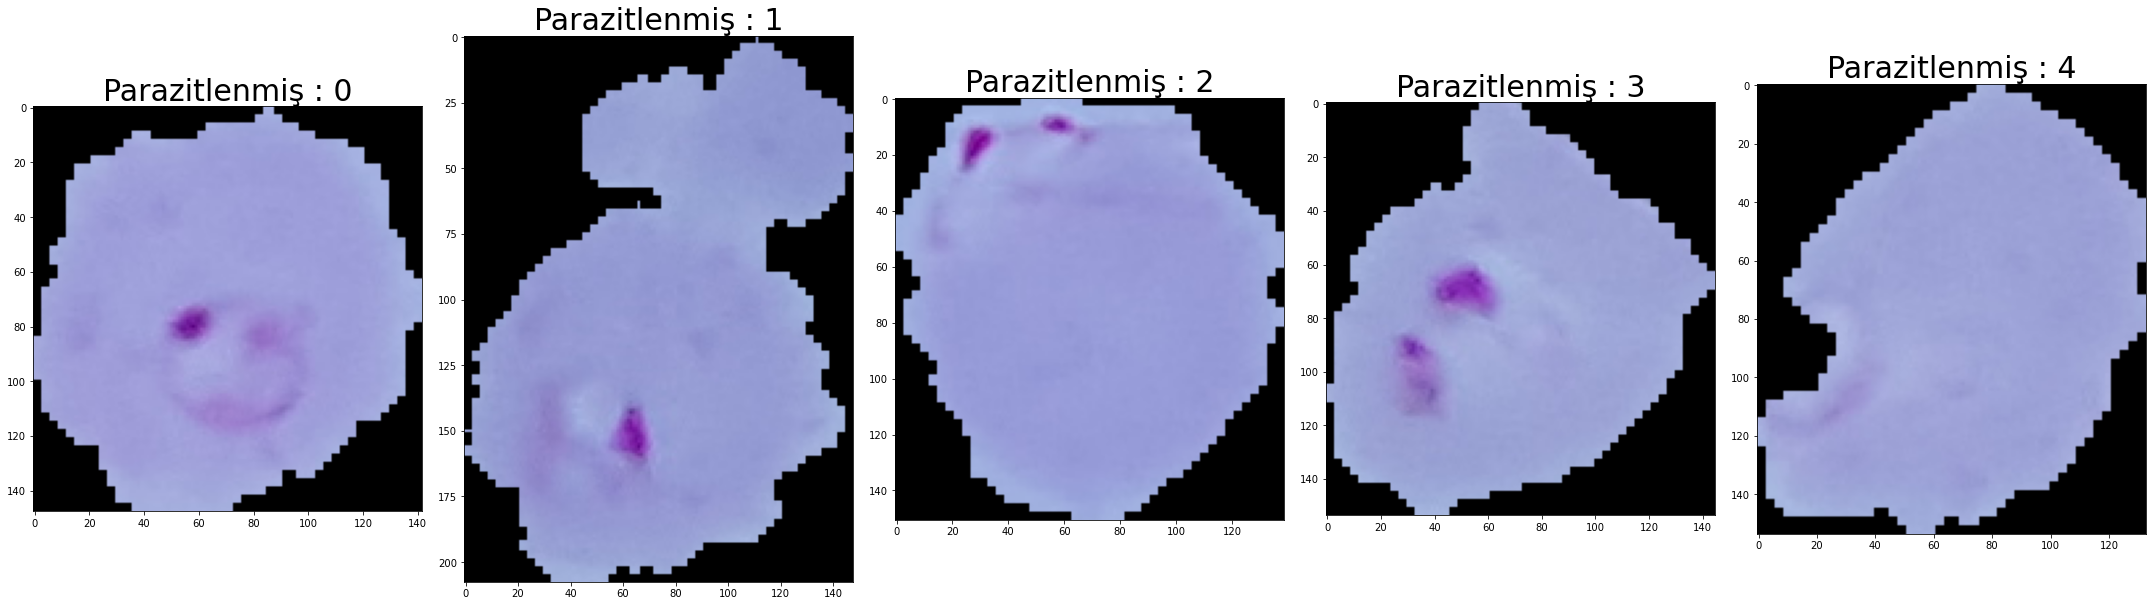

In [20]:
plt.figure(figsize = (30,30))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parazitlenmiş : {i}'.format(i=i),fontsize=30)
    plt.tight_layout()
plt.show()

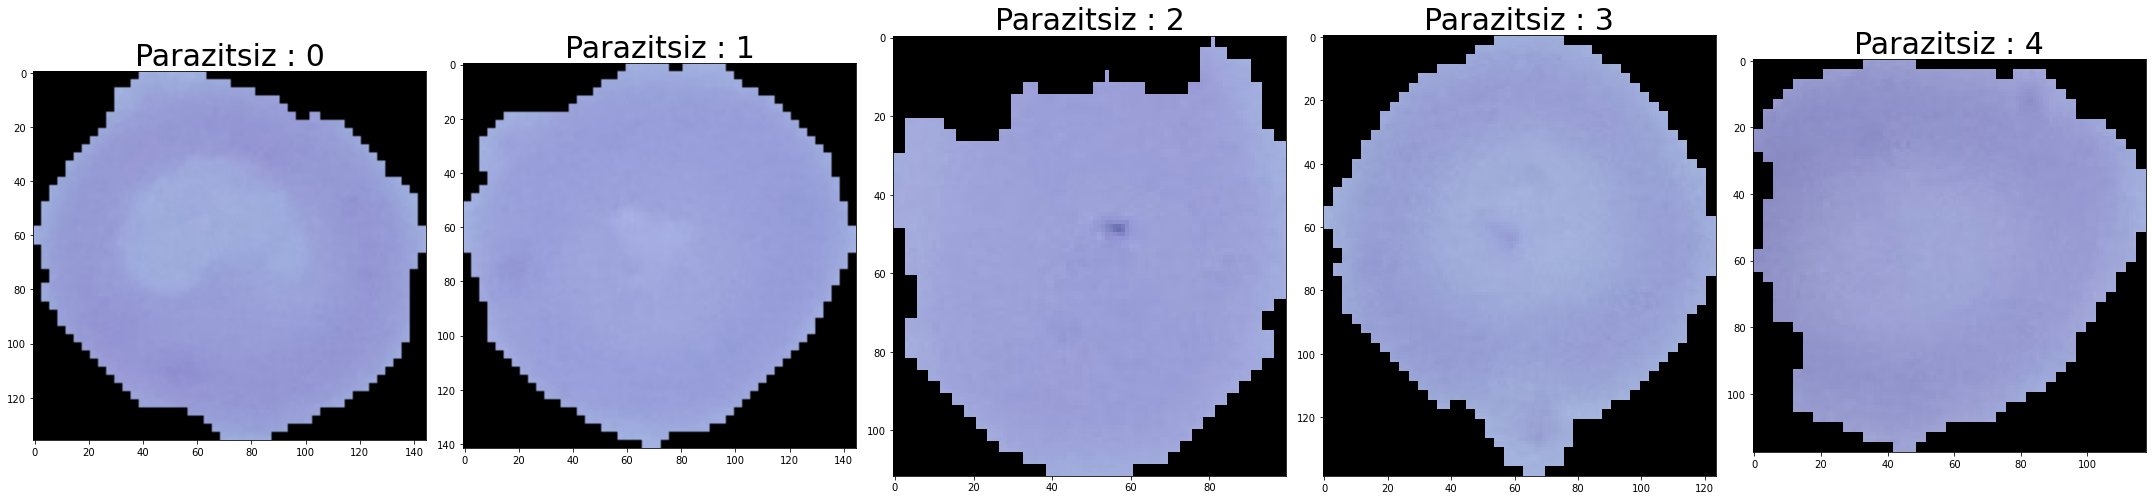

In [21]:
plt.figure(figsize = (30,30))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Parazitsiz : {i}'.format(i=i),fontsize=30)
    plt.tight_layout()
plt.show()

In [24]:
data_dir = pathlib.Path("cell_images/")

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=128)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=128)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [28]:
group = train_ds.class_names

In [29]:
group

['Parasitized', 'Uninfected']

### Modelling

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)   

In [32]:
num_classes = len(group)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 32)        0

In [34]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose=1)

Epoch 1/10
173/173 [==============================] - 264s 1s/step - loss: 0.5588 - accuracy: 0.6960 - val_loss: 0.2473 - val_accuracy: 0.9100
Epoch 2/10
173/173 [==============================] - 219s 1s/step - loss: 0.2085 - accuracy: 0.9269 - val_loss: 0.1752 - val_accuracy: 0.9334
Epoch 3/10
173/173 [==============================] - 218s 1s/step - loss: 0.1732 - accuracy: 0.9385 - val_loss: 0.1586 - val_accuracy: 0.9421
Epoch 4/10
173/173 [==============================] - 213s 1s/step - loss: 0.1610 - accuracy: 0.9432 - val_loss: 0.1545 - val_accuracy: 0.9454
Epoch 5/10
173/173 [==============================] - 220s 1s/step - loss: 0.1457 - accuracy: 0.9496 - val_loss: 0.1515 - val_accuracy: 0.9510
Epoch 6/10
173/173 [==============================] - 212s 1s/step - loss: 0.1349 - accuracy: 0.9543 - val_loss: 0.1508 - val_accuracy: 0.9492
Epoch 7/10
173/173 [==============================] - 212s 1s/step - loss: 0.1274 - accuracy: 0.9566 - val_loss: 0.1450 - val_accuracy: 0.9525

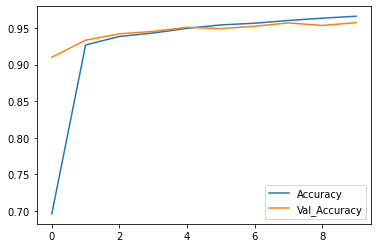

In [35]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend();

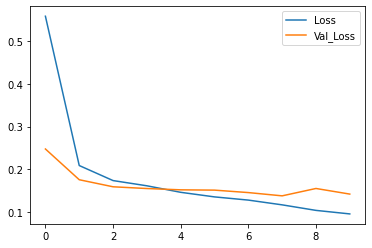

In [36]:
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Val_Loss")
plt.legend();